In [1]:
import os
import io
import json
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!echo "Number of datapoints:"
!wc arxiv-abstracts.json -l | cut -d ' ' -f 1

Number of datapoints:
1999486


In [4]:
!echo "Sample datapoint:"
!tail -n1 arxiv-abstracts.json | jq .

Sample datapoint:
{
  "id": "supr-con/9609004",
  "submitter": "Masanori Ichioka",
  "authors": "Naoki Enomoto, Masanori Ichioka and Kazushige Machida (Okayama Univ.)",
  "title": "Ginzburg Landau theory for d-wave pairing and fourfold symmetric vortex\n  core structure",
  "comments": "12 pages including 8 eps figs, LaTeX with jpsj.sty & epsfig",
  "journal-ref": "J. Phys. Soc. Jpn. 66, 204 (1997).",
  "doi": "10.1143/JPSJ.66.204",
  "abstract": "  The Ginzburg Landau theory for d_{x^2-y^2}-wave superconductors is\nconstructed, by starting from the Gor'kov equation with including correction\nterms up to the next order of ln(T_c/T). Some of the non-local correction terms\nare found to break the cylindrical symmetry and lead to the fourfold symmetric\ncore structure, reflecting the internal degree of freedom in the pair\npotential. Using this extended Ginzburg Landau theory, we investigate the\nfourfold symmetric structure of the pair potential, current and magnetic field\naround an iso

In [3]:
category_counter = collections.Counter()
datapoint_count = 0

with open("arxiv-abstracts.json", "r") as f:
    for line in f:
        datapoint = json.loads(line)
        datapoint_count += 1

        cats = datapoint['categories']
        category_counter.update(cats[0].split(" "))
        


In [4]:
print(f"Unique category count: {len(category_counter)}")

most_common = category_counter.most_common(40)
category_percentages = []
for common in most_common:
  category_percentages.append((common[0], common[1] / datapoint_count * 100))
print(category_percentages)

# Category formatting is found at: https://arxiv.org/category_taxonomy
general_categories = {
  "cs": 0,
  "eco": 0,
  "eng": 0,
  "math": 0,
  "phy": 0,
  "bio": 0,
  "fin": 0,
  "stat": 0
}
for category in category_counter.most_common():
  cat = category[0]
  count = category[1]
  if "cs." in cat:
    general_categories["cs"] += count
    continue
  if "econ." in cat:
    general_categories["eco"] += count
    continue
  if "eess." in cat:
    general_categories["eng"] += count
    continue
  if "math." in cat:
    general_categories["math"] += count
    continue
  if "q-bio." in cat:
    general_categories["bio"] += count
    continue
  if "q-fin." in cat:
    general_categories["fin"] += count
    continue
  if "stat." in cat:
    general_categories["stat"] += count
    continue

  # for phys papers  
  general_categories["phy"] += count



for category in general_categories:
  general_categories[category] = general_categories[category] / datapoint_count * 100
print(general_categories)

  




Unique category count: 176
[('hep-ph', 8.083327415145693), ('hep-th', 7.43110979521737), ('quant-ph', 5.99193992856164), ('astro-ph', 5.270354481101643), ('cs.LG', 4.972127836854071), ('gr-qc', 4.581027324022274), ('cond-mat.mes-hall', 3.851439820033749), ('cond-mat.mtrl-sci', 3.7603664141684416), ('math-ph', 3.4173782662144174), ('math.MP', 3.4173782662144174), ('cs.CV', 3.4134272508034567), ('cond-mat.stat-mech', 3.211725413431252), ('cond-mat.str-el', 3.166463781191766), ('astro-ph.CO', 2.852883190980082), ('math.CO', 2.6502311093951145), ('stat.ML', 2.616872536241814), ('nucl-th', 2.55540673953206), ('astro-ph.GA', 2.500042510925308), ('astro-ph.SR', 2.4821379094427267), ('math.AP', 2.4534805444999366), ('hep-ex', 2.306292717228328), ('math.PR', 2.3043922288028025), ('astro-ph.HE', 2.2707335785296823), ('math.AG', 2.2388753909754806), ('cs.AI', 2.0884367282391576), ('cond-mat.supr-con', 1.9152922301031365), ('cs.IT', 1.8866348651603464), ('math.IT', 1.8866348651603464), ('physics.o

In [2]:
data = {'data': []} 
total_title_length = []
total_abstract_length = []
total_abstract_sentence_count = []


with open("arxiv-abstracts.json", "r") as f:
    for line in f:
        datapoint = json.loads(line)
        clean_title_string_list = [dp.strip() for dp in datapoint["title"].split("\n")]
        clean_title_string = (" ".join(clean_title_string_list)).strip().lower()
        total_title_length.append(len(clean_title_string.split(" ")))
              
        clean_abstract_string_list = [dp.strip() for dp in datapoint["abstract"].split("\n")]
        clean_abstract_string = (" ".join(clean_abstract_string_list)).strip().lower()
        total_abstract_length.append(len(clean_abstract_string.split(" ")))
        total_abstract_sentence_count.append(len(clean_abstract_string.split(".")))

        data['data'].append({"title":clean_title_string, "abstract":clean_abstract_string})

print(f"Average title length and std: {np.mean(total_title_length)}, {np.std(total_title_length)}")
print(f"Average abstract length and std: {np.mean(total_abstract_length)}, {np.std(total_abstract_length)}")
print(f"Average abstract sentence count and std: {np.mean(total_abstract_sentence_count)}, {np.std(total_abstract_sentence_count)}")



Average title length and std: 9.676447346968171, 3.7264296395490635
Average abstract length and std: 135.73877836604007, 63.88653869306213
Average abstract sentence count and std: 7.463236051665278, 3.714215519658363


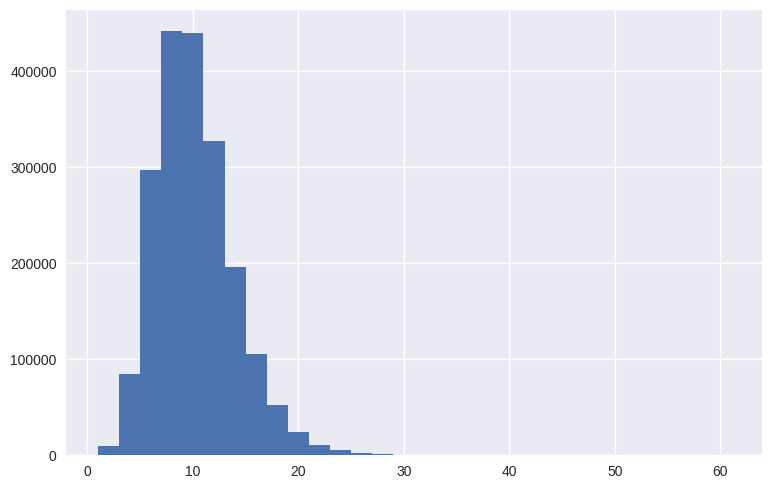

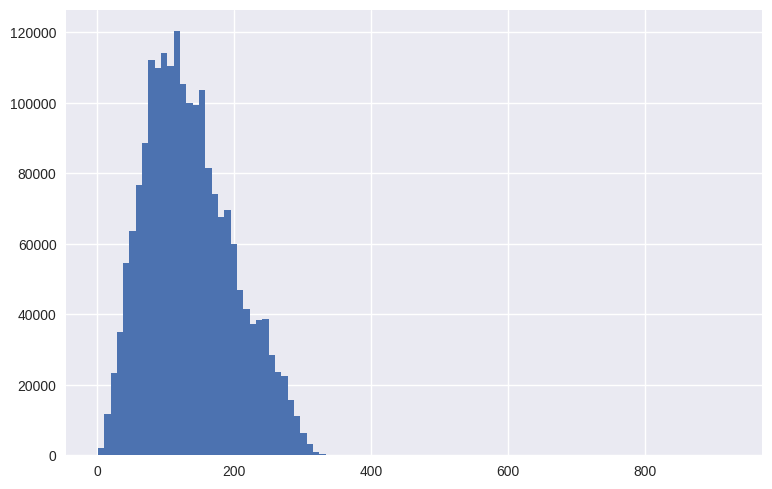

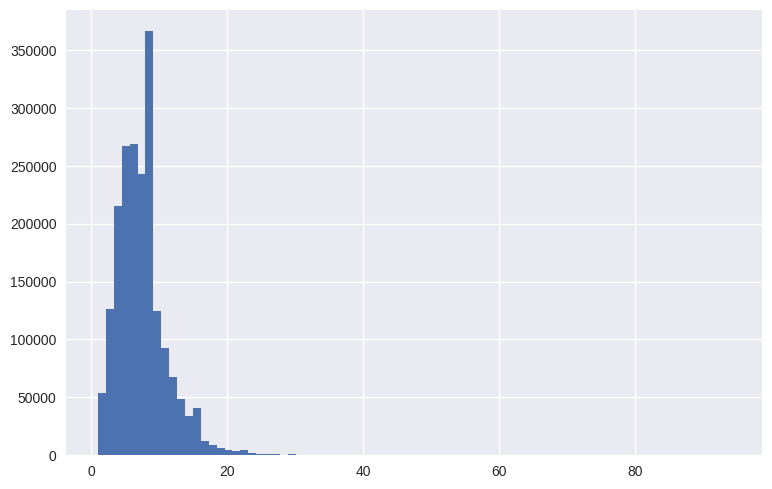

In [45]:
plt.style.use('seaborn-v0_8')
plt.hist(total_title_length, bins=30)
plt.show()

plt.hist(total_abstract_length, bins=100)
plt.show()

plt.hist(total_abstract_sentence_count, bins=80)
plt.show()


In [8]:
title_word_counter = collections.Counter()
abstract_word_counter = collections.Counter()

for dp in data['data']:
    puncuation_removed_title_string = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace() or (x in"-'"), dp['title']))
    puncuation_removed_abstract_string = ''.join(filter(lambda x: x.isalpha() or x.isdigit() or x.isspace() or (x in"-'"), dp['abstract']))
    title_word_counter.update(puncuation_removed_title_string.split(" "))
    abstract_word_counter.update(puncuation_removed_abstract_string.split(" "))



In [9]:
rebuild_title_words = []
for common in title_word_counter.most_common(20):
  rebuild_title_words.append((common[0], common[1] / np.sum(total_title_length) * 100))
print(f"Percentage for top 20 words in titles:\n{rebuild_title_words}")

rebuild_abstract_words = []
for common in abstract_word_counter.most_common(20):
  rebuild_abstract_words.append((common[0], common[1] / np.sum(total_abstract_length) * 100))
print(f"Percentage for top 20 words in abstracts:\n{rebuild_abstract_words}\n")

print(f"Unique title word count: {len(title_word_counter)}")
print(f"Unique abstract word count: {len(abstract_word_counter)}")

Percentage for top 20 words in titles:
[('of', 5.409211666721195), ('the', 3.9882062780802134), ('and', 3.197361618336151), ('in', 3.1529072296708263), ('for', 2.143191508793115), ('a', 2.116997479987643), ('on', 1.3491475389009495), ('with', 1.1959476162839409), ('to', 0.7394489568155669), ('quantum', 0.549268316735426), ('from', 0.5492631482214549), ('model', 0.4431277138251702), ('an', 0.39807377753919915), ('at', 0.37235525201906705), ('by', 0.35308186342088127), ('using', 0.3236316708136238), ('theory', 0.2947913628549548), ('systems', 0.2885633035197942), ('learning', 0.2703184492018548), ('models', 0.2359064831823533)]
Percentage for top 20 words in abstracts:
[('the', 7.430066846239751), ('of', 4.443713694920625), ('and', 2.575027075402225), ('a', 2.5389418911550976), ('in', 2.1964918788420764), ('to', 2.0355808729983123), ('we', 1.5744319819386758), ('is', 1.422081894798398), ('for', 1.2096008873908988), ('that', 1.0476748038183592), ('with', 0.9522298636184673), ('on', 0.7432